<a href="https://cognitiveclass.ai"><img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/IDSNlogo.png" width = 400> </a>

<h1 align=center><font size = 5>Berlin Investment Research</font></h1>

Downloading and installing necessary packages

In [1]:
!pip install bs4
from bs4 import BeautifulSoup
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

!pip install geopandas
import geopandas as gpd

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

!pip install geopy
from geopy import Nominatim # getting geological location data

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


In [2]:
df = gpd.read_file('https://tsb-opendata.s3.eu-central-1.amazonaws.com/ortsteile/lor_ortsteile.geojson')
df.head()

,gml_id,spatial_name,spatial_alias,spatial_type,OTEIL,BEZIRK,FLAECHE_HA,geometry
0,re_ortsteil.0101,0101,Mitte,Polygon,Mitte,Mitte,1063.8748,"POLYGON ((13.41649 52.52696, 13.41635 52.52702..."
1,re_ortsteil.0102,0102,Moabit,Polygon,Moabit,Mitte,768.7909,"POLYGON ((13.33884 52.51974, 13.33884 52.51974..."
2,re_ortsteil.0103,0103,Hansaviertel,Polygon,Hansaviertel,Mitte,52.5337,"POLYGON ((13.34322 52.51557, 13.34323 52.51557..."
3,re_ortsteil.0104,0104,Tiergarten,Polygon,Tiergarten,Mitte,516.0672,"POLYGON ((13.36879 52.49878, 13.36891 52.49877..."
4,re_ortsteil.0105,0105,Wedding,Polygon,Wedding,Mitte,919.9112,"POLYGON ((13.34656 52.53879, 13.34664 52.53878..."


In [3]:
df.shape

(96, 8)

In [4]:
df.drop(columns=['gml_id', 'spatial_alias', 'spatial_type', 'FLAECHE_HA', 'geometry'], axis = 1, inplace=True)

In [5]:
df.head()

,spatial_name,OTEIL,BEZIRK
0,0101,Mitte,Mitte
1,0102,Moabit,Mitte
2,0103,Hansaviertel,Mitte
3,0104,Tiergarten,Mitte
4,0105,Wedding,Mitte


In [6]:
df.rename(columns={'spatial_name':'Area Number', 'OTEIL': 'Neighborhood', 'BEZIRK': 'Borough'}, inplace=True)
df.head()

,Area Number,Neighborhood,Borough
0,0101,Mitte,Mitte
1,0102,Moabit,Mitte
2,0103,Hansaviertel,Mitte
3,0104,Tiergarten,Mitte
4,0105,Wedding,Mitte


In [7]:
def lat_lng_from_string_loc(x):
    
    locator = Nominatim(user_agent='berlin_explorer')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

In [8]:
berlin_locs = df['Neighborhood'].tolist()
berlin_locations_geo = {
    x: lat_lng_from_string_loc(x) 
    for x in berlin_locs
}

# Remove None.
berlin_locations_geo = {
    k: v 
    for k, v in berlin_locations_geo.items()
    if v is not None
}

In [9]:
df2=pd.DataFrame(berlin_locations_geo)
df2.head()

,Mitte,Moabit,Hansaviertel,Tiergarten,Wedding,Gesundbrunnen,Friedrichshain,Kreuzberg,Prenzlauer Berg,Weißensee,Blankenburg,Heinersdorf,Karow,Stadtrandsiedlung Malchow,Pankow,Blankenfelde,Buch,Französisch Buchholz,Niederschönhausen,Rosenthal,Wilhelmsruh,Charlottenburg,Wilmersdorf,Schmargendorf,Grunewald,Westend,Charlottenburg-Nord,Halensee,Spandau,Haselhorst,Siemensstadt,Staaken,Gatow,Kladow,Hakenfelde,Falkenhagener Feld,Wilhelmstadt,Steglitz,Lichterfelde,Lankwitz,Zehlendorf,Dahlem,Nikolassee,Wannsee,Schöneberg,Friedenau,Tempelhof,Mariendorf,Marienfelde,Lichtenrade,Neukölln,Britz,Buckow,Rudow,Gropiusstadt,Alt-Treptow,Plänterwald,Baumschulenweg,Johannisthal,Niederschöneweide,Altglienicke,Adlershof,Bohnsdorf,Oberschöneweide,Köpenick,Friedrichshagen,Rahnsdorf,Grünau,Müggelheim,Schmöckwitz,Marzahn,Biesdorf,Kaulsdorf,Mahlsdorf,Hellersdorf,Friedrichsfelde,Karlshorst,Lichtenberg,Falkenberg,Malchow,Wartenberg,Neu-Hohenschönhausen,Alt-Hohenschönhausen,Fennpfuhl,Rummelsburg,Reinickendorf,Tegel,Konradshöhe,Heiligensee,Frohnau,Hermsdorf,Waidmannslust,Lübars,Wittenau,Märkisches Viertel,Borsigwalde
0,13.404060,13.342542,13.341872,6.956329,13.341970,13.384846,13.450290,13.411914,13.428565,13.463002,10.955199,13.437015,13.486276,13.463285,13.435316,13.388447,7.875963,13.428110,13.401397,8.852919,13.362206,13.309683,13.320330,13.292996,13.263754,13.255842,13.296266,13.292999,13.197792,13.231156,13.256893,13.143367,13.180134,13.140052,13.196769,13.166894,13.191452,13.322287,13.313864,13.345486,13.258930,13.281098,13.198145,13.158937,13.355190,13.329642,13.386448,13.390028,13.366592,13.402040,13.43535,13.442340,14.076153,13.498618,13.466183,13.459874,13.478808,13.481548,13.504547,13.517877,13.542646,13.547550,13.570665,13.523476,13.576413,13.626272,13.701802,18.378797,13.661954,13.648855,13.563142,6.305603,13.580990,13.613162,13.604774,13.520546,13.523585,7.481227,6.595821,12.424517,13.517582,13.514065,13.502549,13.473469,13.483514,13.295287,13.279046,13.223198,13.229579,13.287866,11.856713,13.322533,13.353020,13.323320,13.356532,13.302274
1,52.517885,52.530102,52.519123,50.340922,52.550123,52.550920,52.512215,52.497644,52.539847,52.554619,51.790268,52.572825,52.615087,52.571019,52.597917,52.618627,50.205161,52.610513,52.585806,50.976850,52.588012,52.515747,52.487115,52.478902,52.487347,52.513399,52.540525,52.497226,52.535788,52.541323,52.539808,52.532271,52.485641,52.460293,52.560991,52.552403,52.513921,52.457257,52.437293,52.433698,52.434322,52.457380,52.426249,52.421148,52.482157,52.472075,52.463292,52.440080,52.412577,52.393456,52.48115,52.448332,52.567217,52.414680,52.424949,52.492563,52.479544,52.461694,52.445911,52.454820,52.411838,52.437893,52.402243,52.462456,52.453910,52.449380,52.435873,-27.735380,52.412165,52.375665,52.542948,49.885462,52.510132,52.508699,52.536854,52.502936,52.484340,48.921296,49.048777,53.477564,52.575395,52.566331,52.550409,52.528785,52.501370,52.604763,52.587389,52.585684,52.612255,52.632392,50.897952,52.608035,52.614647,52.591237,52.599312,52.584062


In [10]:
df3= df2.T

In [11]:
df4= df3.reset_index()
df4.head()

,index,0,1
0,Mitte,13.404060,52.517885
1,Moabit,13.342542,52.530102
2,Hansaviertel,13.341872,52.519123
3,Tiergarten,6.956329,50.340922
4,Wedding,13.341970,52.550123


In [12]:
df4.rename(columns={'index':'Neighborhood1', 0:'Longitude', 1: 'Latitude'}, inplace=True)
df4.head()

,Neighborhood1,Longitude,Latitude
0,Mitte,13.404060,52.517885
1,Moabit,13.342542,52.530102
2,Hansaviertel,13.341872,52.519123
3,Tiergarten,6.956329,50.340922
4,Wedding,13.341970,52.550123


In [13]:
neighborhoods = pd.concat([df, df4], axis=1, join='inner')
neighborhoods.drop(['Neighborhood1'], axis=1, inplace= True)
neighborhoods.head()

,Area Number,Neighborhood,Borough,Longitude,Latitude
0,0101,Mitte,Mitte,13.404060,52.517885
1,0102,Moabit,Mitte,13.342542,52.530102
2,0103,Hansaviertel,Mitte,13.341872,52.519123
3,0104,Tiergarten,Mitte,6.956329,50.340922
4,0105,Wedding,Mitte,13.341970,52.550123


In [14]:
address = 'Mitte, Berlin'

geolocator = Nominatim(user_agent="berlin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Berlin are 52.5178855, 13.4040601.


In [15]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 12 boroughs and 96 neighborhoods.


#### Create a map of Berlin with neighborhoods superimposed on top.


In [16]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [17]:
CLIENT_ID = '3NFT2XQDSZUZOYKQHYNDI23TOFBATXRUB4WESMWLGV0PHOWI' # your Foursquare ID
CLIENT_SECRET = 'DWWN5OSAYBLSB1YPJUAVUEAWUPOP3LHNTFHL4UJLJJUZA3RF' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3NFT2XQDSZUZOYKQHYNDI23TOFBATXRUB4WESMWLGV0PHOWI
CLIENT_SECRET:DWWN5OSAYBLSB1YPJUAVUEAWUPOP3LHNTFHL4UJLJJUZA3RF


#### Let's explore the first neighborhood in our dataframe.

In [18]:
neighborhoods.loc[0, 'Neighborhood']

'Mitte'

In [19]:
neighborhood_latitude = neighborhoods.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = neighborhoods.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = neighborhoods.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Mitte are 52.5178855, 13.4040601.


#### Now, let's get the top 100 venues that are in Mitte within a radius of 500 meters.

In [20]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID,
    CLIENT_SECRET,
    VERSION,
    neighborhood_latitude,
    neighborhood_longitude,
    radius,
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '6090de3f185452712057eda0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Mitte',
  'headerFullLocation': 'Mitte, Berlin',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 55,
  'suggestedBounds': {'ne': {'lat': 52.5223855045, 'lng': 13.411441367078982},
   'sw': {'lat': 52.513385495499996, 'lng': 13.396678832921019}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4f42de33e4b0a2bdc6c470ce',
       'name': 'Designpanoptikum - surreales Museum für industrielle Objekte',
       'location': {'address': 'Poststr. 7',
        'lat': 52.516941,
        'lng': 13.406072,
        'labeledLatLngs': [{'label': 'display',
          'lat'

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Designpanoptikum - surreales Museum für indust...,Museum,52.516941,13.406072
1,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",Outdoor Sculpture,52.516290,13.405558
2,Kuppelumgang Berliner Dom,Scenic Lookout,52.518966,13.400981
3,Nikolaiviertel,Neighborhood,52.516782,13.406453
4,Tigertörtchen,Cupcake Shop,52.517150,13.407926


And how many venues were returned by Foursquare?

In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

55 venues were returned by Foursquare.


## 2. Explore Neighborhoods in Berlin

#### Let's create a function to repeat the same process to all the neighborhoods in Berlin


In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [25]:
berlin_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude'] )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Prenzlauer Berg
Weißensee
Blankenburg
Heinersdorf
Karow
Stadtrandsiedlung Malchow
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld
Wilhelmstadt
Steglitz
Lichterfelde
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Buckow
Rudow
Gropiusstadt
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpenick
Friedrichshagen
Rahnsdorf
Grünau
Müggelheim
Schmöckwitz
Marzahn
Biesdorf
Kaulsdorf
Mahlsdorf
Hellersdorf
Friedrichsfelde
Karlshorst
Lichtenberg
Falkenberg
Malchow
Wartenberg
Neu-Hohenschönhausen
Alt-Hohenschönhausen
Fennpfuhl
Rummelsburg
Reinickendorf
Tegel
Kon

In [26]:
print(berlin_venues.shape)
berlin_venues.head()

(2363, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.517885,13.40406,"Bronzestatue ""Heiliger St. Georg im Kampf mit ...",52.516290,13.405558,Outdoor Sculpture
1,Mitte,52.517885,13.40406,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
2,Mitte,52.517885,13.40406,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
3,Mitte,52.517885,13.40406,Nikolaiviertel,52.516782,13.406453,Neighborhood
4,Mitte,52.517885,13.40406,Lustgarten,52.518469,13.399454,Garden


In [27]:
berlin_vtypes = berlin_venues.groupby('Venue Category').count().sort_values('Venue', ascending=False)
berlin_vtypes.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Supermarket,155,155,155,155,155,155
Café,135,135,135,135,135,135
Italian Restaurant,81,81,81,81,81,81
Bakery,80,80,80,80,80,80
German Restaurant,65,65,65,65,65,65


In [28]:
berlin_vtypes2 = berlin_vtypes.drop(columns=['Neighborhood', 'Neighborhood Latitude', 'Neighborhood Longitude', 'Venue Latitude', 'Venue Longitude'], axis = 1, inplace=True)

In [29]:
pd.DataFrame(berlin_vtypes)
berlin_vtypes2 = berlin_vtypes.iloc[:10]
berlin_vtypes2

,Venue
Venue Category,
Supermarket,155
Café,135
Italian Restaurant,81
Bakery,80
German Restaurant,65
Hotel,61
Drugstore,57
Bus Stop,54
Park,49


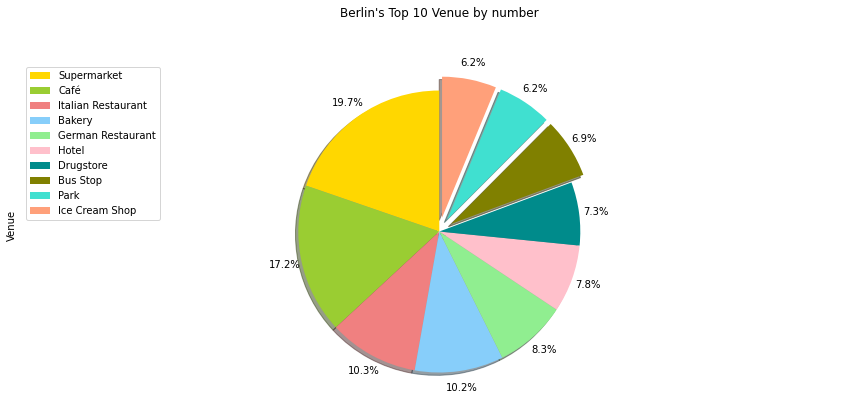

In [30]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink', 'darkcyan', 'olive', 'turquoise', 'lightsalmon']
explode_list = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1] # ratio for each venue with which to offset each wedge.

berlin_vtypes2['Venue'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 2 venues
                            )

# scale the title up by 12% to match pctdistance
plt.title('Berlin\'s Top 10 Venue by number', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=berlin_vtypes2.index, loc='upper left') 

plt.show()

Let's check how many venues were returned for each neighborhood

In [31]:
berlin_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,14,14,14,14,14,14
Alt-Hohenschönhausen,14,14,14,14,14,14
Alt-Treptow,40,40,40,40,40,40
Altglienicke,3,3,3,3,3,3
Baumschulenweg,9,9,9,9,9,9
Blankenburg,5,5,5,5,5,5
Blankenfelde,4,4,4,4,4,4
Bohnsdorf,4,4,4,4,4,4
Borsigwalde,9,9,9,9,9,9


#### Let's find out how many unique categories can be curated from all the returned venues

In [32]:
print('There are {} uniques categories.'.format(len(berlin_venues['Venue Category'].unique())))

There are 304 uniques categories.


## 3. Analyze Each Neighborhood

In [33]:
# one hot encoding
berlin_onehot = pd.get_dummies(berlin_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
berlin_onehot['Neighborhood'] = berlin_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [berlin_onehot.columns[-1]] + list(berlin_onehot.columns[:-1])
berlin_onehot = berlin_onehot[fixed_columns]

berlin_onehot.head()

,Zoo Exhibit,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Korean Restaurant,Kurdish Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Neighborhood,Newsstand,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Roof Deck,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Schnitzel Restaurant,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Syrian Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tour Provider,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Trattoria/Oster

In [34]:
berlin_onehot.shape

(2363, 304)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [35]:
berlin_grouped = berlin_onehot.groupby('Neighborhood').mean().reset_index()
berlin_grouped.head()

,Neighborhood,Zoo Exhibit,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,Auto Dealership,Auto Garage,Automotive Shop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Bavarian Restaurant,Beach,Beach Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bistro,Boarding House,Boat Rental,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brasserie,Breakfast Spot,Brewery,Building,Burger Joint,Burrito Place,Bus Stop,Business Service,Butcher,Café,Cajun / Creole Restaurant,Canal,Canal Lock,Candy Store,Caribbean Restaurant,Castle,Caucasian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Roaster,Coffee Shop,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Costume Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Currywurst Joint,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distillery,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Empanada Restaurant,Escape Room,Event Service,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,Football Stadium,Forest,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Go Kart Track,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Imported Food Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Indonesian Restaurant,Indoor Play Area,Insurance Office,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Karaoke Bar,Kebab Restaurant,Kids Store,Kofte Place,Korean Restaurant,Kurdish Restaurant,Lake,Laser Tag,Latin American Restaurant,Laundry Service,Lebanese Restaurant,Light Rail Station,Liquor Store,Lounge,Market,Martial Arts School,Medical Center,Mediterranean Restaurant,Memorial Site,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Monument / Landmark,Motel,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Store,Music Venue,Nature Preserve,Newsstand,Nightclub,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Pakistani Restaurant,Palace,Paper / Office Supplies Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Perfume Shop,Peruvian Restaurant,Pet Café,Pet Service,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pide Place,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Racetrack,Ramen Restaurant,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Road,Rock Climbing Spot,Roof Deck,Sandwich Place,Sauna / Steam Room,Scenic Lookout,Schnitzel Restaurant,Sculpture Garden,Seafood Restaurant,Shawarma Place,Shipping Store,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Club,Stables,Stadium,Steakhouse,Street Art,Street Food Gathering,Supermarket,Sushi Restaurant,Swabian Restaurant,Syrian Restaurant,Tanning Salon,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Thrift / Vintage Store,Tibetan Restaurant,Tour Provider,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Trattoria/Oster

In [36]:
berlin_grouped.shape

(93, 304)

#### Let's print each neighborhood along with the top 5 most common venues

In [37]:
num_top_venues = 5

for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adlershof----
                venue  freq
0         Supermarket  0.29
1  Italian Restaurant  0.07
2           Drugstore  0.07
3   German Restaurant  0.07
4    Greek Restaurant  0.07


----Alt-Hohenschönhausen----
              venue  freq
0    History Museum  0.07
1  Asian Restaurant  0.07
2     Big Box Store  0.07
3  Business Service  0.07
4       Coffee Shop  0.07


----Alt-Treptow----
                   venue  freq
0              Nightclub  0.12
1                   Café  0.08
2     Italian Restaurant  0.05
3               Bus Stop  0.05
4  Street Food Gathering  0.02


----Altglienicke----
                  venue  freq
0              Bus Stop  0.67
1                Forest  0.33
2           Zoo Exhibit  0.00
3  Outdoor Supply Store  0.00
4      Pedestrian Plaza  0.00


----Baumschulenweg----
          venue  freq
0   Supermarket  0.22
1  Credit Union  0.11
2        Bakery  0.11
3      Pharmacy  0.11
4          Café  0.11


----Blankenburg----
               venue  freq
0         

First, let's write a function to sort the venues in descending order.

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = berlin_grouped['Neighborhood']

for ind in np.arange(berlin_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(berlin_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adlershof,Supermarket,Pet Store,Greek Restaurant,Steakhouse,Plaza,German Restaurant,Italian Restaurant,Athletics & Sports,Light Rail Station,Drugstore
1,Alt-Hohenschönhausen,Discount Store,Coffee Shop,Tram Station,Gas Station,History Museum,Big Box Store,Supermarket,Asian Restaurant,Drugstore,Hotel
2,Alt-Treptow,Nightclub,Café,Bus Stop,Italian Restaurant,Tapas Restaurant,Outdoor Sculpture,Organic Grocery,Snack Place,Garden Center,Newsstand
3,Altglienicke,Bus Stop,Forest,Zoo,Fish Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service
4,Baumschulenweg,Supermarket,Bakery,Playground,Credit Union,Vietnamese Restaurant,Drugstore,Pharmacy,Café,Financial or Legal Service,Exhibit


## 4. Cluster Neighborhoods

Run _k_-means to cluster the neighborhood into 3 clusters.

In [40]:
# set number of clusters
kclusters = 5

berlin_grouped_clustering = berlin_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(berlin_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 1, 1, 0, 2, 1, 1, 2, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [41]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

berlin_merged = neighborhoods

# merge berlin_grouped with nieghborhoods to add latitude/longitude for each neighborhood
berlin_merged = berlin_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

berlin_merged.head() # check the last columns!

,Area Number,Neighborhood,Borough,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0101,Mitte,Mitte,13.404060,52.517885,1.0,Hotel,Art Gallery,History Museum,Café,Plaza,German Restaurant,Coffee Shop,Optical Shop,Exhibit,Scenic Lookout
1,0102,Moabit,Mitte,13.342542,52.530102,1.0,Burger Joint,Doner Restaurant,Gym / Fitness Center,Bar,Cocktail Bar,German Restaurant,Café,Hostel,Italian Restaurant,Hotel
2,0103,Hansaviertel,Mitte,13.341872,52.519123,1.0,Café,Bakery,Restaurant,Hotel,Italian Restaurant,Waterfront,Bistro,Art Museum,Park,Gastropub
3,0104,Tiergarten,Mitte,6.956329,50.340922,1.0,Hotel,Rental Car Location,German Restaurant,Steakhouse,Bar,Eastern European Restaurant,Trail,Restaurant,Racetrack,Castle
4,0105,Wedding,Mitte,13.341970,52.550123,1.0,Café,Middle Eastern Restaurant,Ice Cream Shop,Chinese Restaurant,Bar,Gas Station,Tram Station,Bowling Alley,Kofte Place,Grocery Store


In [42]:
berlin_merged = berlin_merged.dropna()
berlin_merged.tail()

,Area Number,Neighborhood,Borough,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
91,1207,Waidmannslust,Reinickendorf,13.322533,52.608035,2.0,Supermarket,Drugstore,Gym / Fitness Center,Italian Restaurant,Fast Food Restaurant,Light Rail Station,Electronics Store,Hardware Store,Shopping Mall,Greek Restaurant
92,1208,Lübars,Reinickendorf,13.353020,52.614647,1.0,Comfort Food Restaurant,Ice Cream Shop,Stables,Restaurant,Fish Market,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market
93,1209,Wittenau,Reinickendorf,13.323320,52.591237,1.0,Park,Supermarket,Post Office,Restaurant,Eastern European Restaurant,Mediterranean Restaurant,Trattoria/Osteria,Metro Station,German Restaurant,Italian Restaurant
94,1210,Märkisches Viertel,Reinickendorf,13.356532,52.599312,1.0,Hotel,Italian Restaurant,Post Office,Restaurant,Café,Soccer Field,Miscellaneous Shop,Garden Center,Electronics Store,Bus Stop
95,1211,Borsigwalde,Reinickendorf,13.302274,52.584062,1.0,Motorcycle Shop,Mexican Restaurant,Liquor Store,Supermarket,Go Kart Track,Fast Food Restaurant,Office,Athletics & Sports,Flea Market,Farmers Market


In [43]:
condition = [
    (berlin_merged['Cluster Labels'] == 0),
    (berlin_merged['Cluster Labels'] == 1),
    (berlin_merged['Cluster Labels'] == 2),
    (berlin_merged['Cluster Labels'] == 3),
    (berlin_merged['Cluster Labels'] == 4)
    ]
label_names = ['Public Services', 'Retail Stores', 'General Services', 'Historic Site', 'Event Locations']
berlin_merged['Cluster Name'] = np.select(condition, label_names)
berlin_merged.head(25)

,Area Number,Neighborhood,Borough,Longitude,Latitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
0,0101,Mitte,Mitte,13.404060,52.517885,1.0,Hotel,Art Gallery,History Museum,Café,Plaza,German Restaurant,Coffee Shop,Optical Shop,Exhibit,Scenic Lookout,Retail Stores
1,0102,Moabit,Mitte,13.342542,52.530102,1.0,Burger Joint,Doner Restaurant,Gym / Fitness Center,Bar,Cocktail Bar,German Restaurant,Café,Hostel,Italian Restaurant,Hotel,Retail Stores
2,0103,Hansaviertel,Mitte,13.341872,52.519123,1.0,Café,Bakery,Restaurant,Hotel,Italian Restaurant,Waterfront,Bistro,Art Museum,Park,Gastropub,Retail Stores
3,0104,Tiergarten,Mitte,6.956329,50.340922,1.0,Hotel,Rental Car Location,German Restaurant,Steakhouse,Bar,Eastern European Restaurant,Trail,Restaurant,Racetrack,Castle,Retail Stores
4,0105,Wedding,Mitte,13.341970,52.550123,1.0,Café,Middle Eastern Restaurant,Ice Cream Shop,Chinese Restaurant,Bar,Gas Station,Tram Station,Bowling Alley,Kofte Place,Grocery Store,Retail Stores
5,0106,Gesundbrunnen,Mitte,13.384846,52.550920,1.0,Turkish Restaurant,Café,Platform,Drugstore,Bar,Trail,Supermarket,Bakery,Bookstore,Clothing Store,Retail Stores
6,0201,Friedrichshain,Friedrichshain-Kreuzberg,13.450290,52.512215,1.0,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Nightclub,Pub,Middle Eastern Restaurant,Bar,Ice Cream Shop,Record Shop,Bagel Shop,Retail Stores
7,0202,Kreuzberg,Friedrichshain-Kreuzberg,13.411914,52.497644,1.0,Coffee Shop,Bar,Café,German Restaurant,Turkish Restaurant,Cocktail Bar,Bakery,Dance Studio,Ice Cream Shop,Wine Bar,Retail Stores
8,0301,Prenzlauer Berg,Pankow,13.428565,52.539847,1.0,Café,Bakery,Vietnamese Restaurant,Supermarket,Coffee Shop,Beer Bar,Italian Restaurant,Bar,Gourmet Shop,Falafel Restaurant,Retail Stores
9,0302,Weißensee,Pankow,13.463002,52.554619,1.0,Supermarket,German Restaurant,Lake,Burger Joint,Italian Restaurant,Park,Laser Tag,Tram Station,Bistro,Beach,Retail Stores


Finally, let's visualize the resulting clusters

In [44]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = ['red', 'green', 'blue']
for lat, lon, poi, cluster, name, most_common, second_most in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels'], berlin_merged['Cluster Name'], berlin_merged['1st Most Common Venue'], berlin_merged['2nd Most Common Venue']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(name) + ' 1st ' + str(most_common) + ' 2nd ' + str(second_most), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [45]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 0, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
20,Wilhelmsruh,0.0,Bus Stop,Post Office,Supermarket,Bakery,Music Venue,Mexican Restaurant,Restaurant,Clothing Store,Financial or Legal Service,Falafel Restaurant,Public Services
31,Staaken,0.0,Bus Stop,Restaurant,Soccer Field,Supermarket,Eastern European Restaurant,Train Station,Exhibit,Falafel Restaurant,Farm,Farmers Market,Public Services
34,Hakenfelde,0.0,Pool,Playground,Miscellaneous Shop,Bus Stop,German Restaurant,Financial or Legal Service,Exhibit,Falafel Restaurant,Farm,Farmers Market,Public Services
36,Wilhelmstadt,0.0,Bus Stop,Harbor / Marina,Supermarket,Pool,Boat or Ferry,Lake,Gastropub,Liquor Store,Park,Argentinian Restaurant,Public Services
56,Plänterwald,0.0,Bus Stop,Playground,Liquor Store,Memorial Site,Supermarket,Lake,Light Rail Station,Exhibit,Falafel Restaurant,Farm,Public Services
60,Altglienicke,0.0,Bus Stop,Forest,Zoo,Fish Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Public Services


In [46]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 1, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
0,Mitte,1.0,Hotel,Art Gallery,History Museum,Café,Plaza,German Restaurant,Coffee Shop,Optical Shop,Exhibit,Scenic Lookout,Retail Stores
1,Moabit,1.0,Burger Joint,Doner Restaurant,Gym / Fitness Center,Bar,Cocktail Bar,German Restaurant,Café,Hostel,Italian Restaurant,Hotel,Retail Stores
2,Hansaviertel,1.0,Café,Bakery,Restaurant,Hotel,Italian Restaurant,Waterfront,Bistro,Art Museum,Park,Gastropub,Retail Stores
3,Tiergarten,1.0,Hotel,Rental Car Location,German Restaurant,Steakhouse,Bar,Eastern European Restaurant,Trail,Restaurant,Racetrack,Castle,Retail Stores
4,Wedding,1.0,Café,Middle Eastern Restaurant,Ice Cream Shop,Chinese Restaurant,Bar,Gas Station,Tram Station,Bowling Alley,Kofte Place,Grocery Store,Retail Stores
5,Gesundbrunnen,1.0,Turkish Restaurant,Café,Platform,Drugstore,Bar,Trail,Supermarket,Bakery,Bookstore,Clothing Store,Retail Stores
6,Friedrichshain,1.0,Café,Coffee Shop,Vegetarian / Vegan Restaurant,Nightclub,Pub,Middle Eastern Restaurant,Bar,Ice Cream Shop,Record Shop,Bagel Shop,Retail Stores
7,Kreuzberg,1.0,Coffee Shop,Bar,Café,German Restaurant,Turkish Restaurant,Cocktail Bar,Bakery,Dance Studio,Ice Cream Shop,Wine Bar,Retail Stores
8,Prenzlauer Berg,1.0,Café,Bakery,Vietnamese Restaurant,Supermarket,Coffee Shop,Beer Bar,Italian Restaurant,Bar,Gourmet Shop,Falafel Restaurant,Retail Stores
9,Weißensee,1.0,Supermarket,German Restaurant,Lake,Burger Joint,Italian Restaurant,Park,Laser Tag,Tram Station,Bistro,Beach,Retail Stores


In [47]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 2, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
11,Heinersdorf,2.0,Supermarket,Tram Station,Fish Market,Fried Chicken Joint,Discount Store,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,General Services
12,Karow,2.0,Supermarket,German Restaurant,Bus Stop,Flea Market,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,General Services
14,Pankow,2.0,Supermarket,Tram Station,Asian Restaurant,Football Stadium,Financial or Legal Service,Exhibit,Falafel Restaurant,Forest,Farm,Farmers Market,General Services
17,Französisch Buchholz,2.0,Supermarket,Plaza,Tram Station,Garden Center,Flower Shop,Drugstore,Financial or Legal Service,Exhibit,Falafel Restaurant,Farm,General Services
33,Kladow,2.0,Supermarket,Financial or Legal Service,Liquor Store,Pier,Organic Grocery,Bus Stop,Pharmacy,Zoo,Falafel Restaurant,Farm,General Services
35,Falkenhagener Feld,2.0,Supermarket,Drugstore,Snack Place,Soccer Field,Event Service,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,General Services
47,Mariendorf,2.0,Supermarket,Steakhouse,Motorcycle Shop,Drugstore,Food & Drink Shop,Fried Chicken Joint,German Restaurant,Park,Chinese Restaurant,Bakery,General Services
48,Marienfelde,2.0,Bus Stop,Supermarket,Chinese Restaurant,Bakery,Farmers Market,Fast Food Restaurant,Tennis Court,Gas Station,Pizza Place,Park,General Services
49,Lichtenrade,2.0,Supermarket,Soccer Field,Bus Stop,Doner Restaurant,Department Store,German Restaurant,Restaurant,Farm,Farmers Market,Fast Food Restaurant,General Services
53,Rudow,2.0,Supermarket,Italian Restaurant,Health & Beauty Service,Drugstore,Department Store,Bank,Ice Cream Shop,Fish Market,Exhibit,Falafel Restaurant,General Services


In [48]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 3, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
88,Heiligensee,3.0,Insurance Office,Supermarket,Flea Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,Historic Site


In [49]:
berlin_merged.loc[berlin_merged['Cluster Labels'] == 4, berlin_merged.columns[[1] + list(range(5, berlin_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Name
67,Grünau,4.0,Hotel,Zoo,Flea Market,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Financial or Legal Service,Fish Market,Event Locations


In [50]:
url= 'https://de.wikipedia.org/wiki/Verwaltungsgliederung_Berlins'
html=requests.get(url).text

In [51]:
soup = BeautifulSoup(html, 'html5lib')

In [52]:
#find all html tables in the web page
tables = soup.find_all('table') # in html table is represented by the tag <table>

In [53]:
len(tables)

4

In [54]:
for index,table in enumerate(tables):
    if ("Ortsteil" in str(table)):
        table_index = index
print(table_index)

1


In [55]:
print(tables[table_index].prettify())

<table class="wikitable sortable zebra">
 <tbody>
  <tr class="hintergrundfarbe6">
   <th>
    Nr.
   </th>
   <th>
    Ortsteil
    <br/>
   </th>
   <th>
    Bezirk
    <br/>
   </th>
   <th>
    Fläche
    <br/>
    (km²)
    <br/>
   </th>
   <th>
    Einwohner
    <sup class="reference" id="cite_ref-Bevölkerung_2-1">
     <a href="#cite_note-Bevölkerung-2">
      [2]
     </a>
    </sup>
    <br/>
    <small>
     (31. Dezember 2020)
    </small>
    <br/>
   </th>
   <th>
    Einwohner
    <br/>
    pro km²
   </th>
  </tr>
  <tr>
   <td align="center">
    <span style="visibility:hidden;">
     0
    </span>
    101
   </td>
   <td>
    <a href="/wiki/Berlin-Mitte" title="Berlin-Mitte">
     Mitte
    </a>
   </td>
   <td>
    <a href="/wiki/Bezirk_Mitte" title="Bezirk Mitte">
     Mitte
    </a>
   </td>
   <td align="right">
    10,70
   </td>
   <td align="right">
    102.338
   </td>
   <td align="right">
    9564
   </td>
  </tr>
  <tr>
   <td align="center">
    <span styl

In [56]:
population_data = pd.DataFrame(columns=["Nr", "Neighborhood", "Borough", "Population", "Area", "Density"])

for row in tables[table_index].tbody.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
        nr = col[0].text.strip()
        neighborhood = col[1].text.strip()
        borough = col[2].text.strip()
        population = col[3].text.strip().replace(',', '.').replace('<', '')
        area = col[4].text.strip()
        density = col[5].text.strip().replace('.', '').replace(',', '.')
        population_data = population_data.append({"Nr":nr, "Neighborhood":neighborhood, "Borough":borough, "Population":population, "Area":area, "Density":density}, ignore_index=True)

population_data.head()

,Nr,Neighborhood,Borough,Population,Area,Density
0,0101,Mitte,Mitte,10.70,102.338,9564
1,0102,Moabit,Mitte,7.72,81.021,10495
2,0103,Hansaviertel,Mitte,0.53,5.924,11177
3,0104,Tiergarten,Mitte,5.17,14.940,2890
4,0105,Wedding,Mitte,9.23,85.275,9239


In [57]:
population_data['Density'] = population_data['Density'].astype(float)
population_data.head()

,Nr,Neighborhood,Borough,Population,Area,Density
0,0101,Mitte,Mitte,10.70,102.338,9564.0
1,0102,Moabit,Mitte,7.72,81.021,10495.0
2,0103,Hansaviertel,Mitte,0.53,5.924,11177.0
3,0104,Tiergarten,Mitte,5.17,14.940,2890.0
4,0105,Wedding,Mitte,9.23,85.275,9239.0


In [58]:
# download Berlin geojson file
!wget --quiet https://tsb-opendata.s3.eu-central-1.amazonaws.com/ortsteile/lor_ortsteile.geojson
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [59]:
berlin_geo = r'lor_ortsteile.geojson' # geojson file

# create a plain world map
berlin_map = folium.Map(location=[52.520008, 13.404954], zoom_start=11)

In [82]:
berlin_map.choropleth(
    geo_data=berlin_geo,
    data=population_data,
    columns=['Neighborhood', 'Density'],
    key_on='feature.properties.OTEIL',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Berlin Population Density'
)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = ['red', 'green', 'blue']
for lat, lon, poi, cluster, name, most_common, second_most in zip(berlin_merged['Latitude'], berlin_merged['Longitude'], berlin_merged['Neighborhood'], berlin_merged['Cluster Labels'], berlin_merged['Cluster Name'], berlin_merged['1st Most Common Venue'], berlin_merged['2nd Most Common Venue']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(name) + ' 1st ' + str(most_common) + ' 2nd ' + str(second_most), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(berlin_map)
    
berlin_map

TypeError: can't multiply sequence by non-int of type 'float'

In [2]:
df = pd.read_csv('berlin_gdp2.csv')
df

,Year,gdp
0,2009,99191.642
1,2010,103051.696
2,2011,108111.270
3,2012,109771.987
4,2013,112881.339
5,2014,118518.729
6,2015,124995.885
7,2016,133218.231
8,2017,139266.007
9,2018,145547.125


Text(0.5, 0, 'Years')

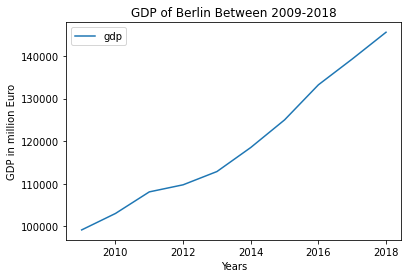

In [9]:
df.plot(x ='Year', y='gdp', kind = 'line')
plt.title('GDP of Berlin Between 2009-2018')
plt.ylabel('GDP in million Euro')
plt.xlabel('Years')

In [ ]:
num_top_venues = 5
final_df_list2 = []


for hood in berlin_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = berlin_grouped[berlin_grouped['Neighborhood'] == hood].T.reset_index()
  
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['neighborhood_name']=hood
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    final_df_list2.append(temp)

    print('\n')

In [ ]:
final_df_list2[20].sort_values(by=['freq'], ascending=False).head()